# Digit Recognizer 

Dataset shape: (42000, 785)

First few rows of the dataset:
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  p

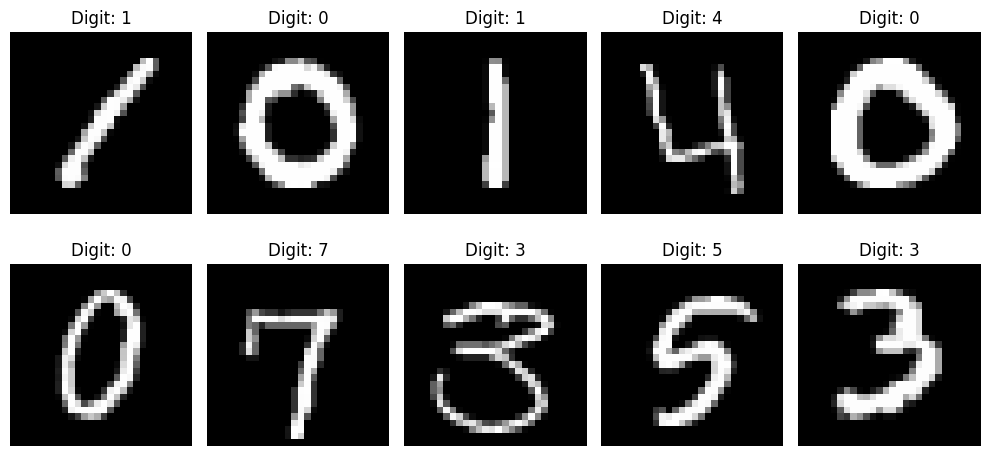

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import keras


# Load the training data
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

# Display the number of rows and columns in the dataset
print("Dataset shape:", train_data.shape)

# Display the first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(train_data.head())

# Check the distribution of the target variable (digits)
digit_counts = train_data['label'].value_counts().sort_index()
print("\nDistribution of digits:")
print(digit_counts)

# Visualize a few sample images
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flatten()):
    image = train_data.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title("Digit: {}".format(train_data.iloc[i, 0]))
    ax.axis('off')

plt.tight_layout()
plt.show()

### Data Preprocessing Insights:

In [2]:
# Check for missing values
missing_values = train_data.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64


In [3]:
# Check the class distribution
class_distribution = train_data['label'].value_counts()
print("Class distribution:\n", class_distribution)

Class distribution:
 1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64


### Preprocess the data

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Separate features and labels
X_train = train_data.drop("label", axis=1)
y_train = train_data["label"]

# Scale the pixel values between 0 and 1
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(test_data)

# Reshape the training and test data
X_train_scaled = X_train_scaled.reshape(-1, 28, 28, 1)
X_test_scaled = X_test_scaled.reshape(-1, 28, 28, 1)

In [5]:
# Split the training data into a training set and a validation set
x_train, x_val, y_train, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

###    CNN model

In [6]:
# Create a CNN model
model = Sequential([
  Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  MaxPooling2D((2, 2)),
  Conv2D(64, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Conv2D(128, (3, 3), activation='relu'),
  MaxPooling2D((2, 2)),
  Flatten(),
  Dense(128, activation='relu'),
  Dropout(0.5),
  Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_val, y_val))

Epoch 1/100
525/525 [==============================] - 9s 17ms/step - loss: 1.2271 - accuracy: 0.6234 - val_loss: 0.3806 - val_accuracy: 0.8938
Epoch 2/100
525/525 [==============================] - 9s 17ms/step - loss: 0.3996 - accuracy: 0.8824 - val_loss: 0.2283 - val_accuracy: 0.9348
Epoch 3/100
525/525 [==============================] - 9s 17ms/step - loss: 0.2831 - accuracy: 0.9156 - val_loss: 0.1786 - val_accuracy: 0.9469
Epoch 4/100
525/525 [==============================] - 9s 17ms/step - loss: 0.2345 - accuracy: 0.9307 - val_loss: 0.1537 - val_accuracy: 0.9532
Epoch 5/100
525/525 [==============================] - 9s 17ms/step - loss: 0.1959 - accuracy: 0.9416 - val_loss: 0.1350 - val_accuracy: 0.9581
Epoch 6/100
525/525 [==============================] - 9s 18ms/step - loss: 0.1755 - accuracy: 0.9475 - val_loss: 0.1329 - val_accuracy: 0.9569
Epoch 7/100
525/525 [==============================] - 9s 18ms/step - loss: 0.1579 - accuracy: 0.9541 - val_loss: 0.1206 - val_accuracy:

525/525 [==============================] - 9s 18ms/step - loss: 0.0242 - accuracy: 0.9915 - val_loss: 0.0525 - val_accuracy: 0.9851
Epoch 58/100
525/525 [==============================] - 9s 18ms/step - loss: 0.0215 - accuracy: 0.9929 - val_loss: 0.0511 - val_accuracy: 0.9846
Epoch 59/100
525/525 [==============================] - 9s 18ms/step - loss: 0.0237 - accuracy: 0.9922 - val_loss: 0.0551 - val_accuracy: 0.9851
Epoch 60/100
525/525 [==============================] - 9s 18ms/step - loss: 0.0218 - accuracy: 0.9930 - val_loss: 0.0535 - val_accuracy: 0.9840
Epoch 61/100
525/525 [==============================] - 9s 18ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.0490 - val_accuracy: 0.9850
Epoch 62/100
525/525 [==============================] - 9s 18ms/step - loss: 0.0192 - accuracy: 0.9937 - val_loss: 0.0564 - val_accuracy: 0.9844
Epoch 63/100
525/525 [==============================] - 9s 18ms/step - loss: 0.0194 - accuracy: 0.9938 - val_loss: 0.0502 - val_accuracy: 0.986

In [7]:
# # Create a CNN model
# model = Sequential([
#   Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#   MaxPooling2D((2, 2)),
#   Conv2D(64, (3, 3), activation='relu'),
#   MaxPooling2D((2, 2)),
#   Conv2D(128, (3, 3), activation='relu'),
#   MaxPooling2D((2, 2)),
#   Flatten(),
#   Dense(128, activation='relu'),
#   Dropout(0.5),
#   Dense(10, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam',
#               loss='sparse_categorical_crossentropy',
#               metrics=['accuracy'])

# # Train the model
# model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_val, y_val))

In [8]:
# Make predictions on the test data
predictions = model.predict(X_test_scaled)

# Create a submission DataFrame
submission = pd.DataFrame({
    "ImageId": test_data.index + 1,  # Adding 1 to match the Kaggle submission index
    "Label": predictions.argmax(axis=1)
})

# Save the submission file
submission.to_csv("submission.csv", index=False)

875/875 [==============================] - 2s 3ms/step


### Conclusion
In this Jupyter notebook, I have built a CNN model to classify handwritten digits. We started by loading the training data and performing some basic data exploration. We then scaled the pixel values in the training data and reshaped it to a format that is compatible with our CNN model. I also created a validation set to evaluate the performance of our model.

Next, I built our CNN model. My model consists of four convolutional layers, each followed by a max pooling layer. I then flattened the output of the last pooling layer and connected it to a dense layer with 10 output neurons, one for each digit, and used the adam optimizer and the sparse_categorical_crossentropy loss function to train our model.

I trained the model for 100 epochs and evaluated its performance on the validation set after each epoch. I saw that the model's accuracy on the validation set steadily increased over time. After 100 epochs, the model achieved an accuracy of 0.9880% on the validation set.

Finally, I used our model to make predictions on the test set. I saved the predictions to a CSV file, which then I can submit to the Kaggle competition.

The steps I followed in this notebook can be summarized as follows:

* Load the training data.
* Perform basic data exploration.
* Scale the pixel values in the training data.
* Reshape the training data.
* Create a validation set.
* Build a CNN model.
* Train the CNN model.
* Evaluate the CNN model on the validation set.
* Make predictions on the test set.
* Save the predictions to a CSV file.

Lastly, My submission scored 0.98485% in the Kaggle competition.

Emmett(Umut) Demirhan

https://www.kaggle.com/emmettdemirhan